# *📊 Employee Attrition - Model Selection & Fine Tuning*

---

## *Author*  
**Kfir Tayar**  

## *Notebook Overview*  
- Split the Data Frame into X & y 
- Split the data into train and test sets
- Define models for evaluation  
- Plot the result of the model and choose the best one  
- Perform Fine-Tuning of the best model (Using GridSearch & CV) 
- Get the best score and plot the metrics

In [2]:
# Import Libraries & Modules
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Add the path to the utils directory
sys.path.append(os.path.abspath('../utils'))

In [3]:
filtered_df = pd.read_pickle("../data/filtered_employee_data_20250326.pkl")

In [4]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Years at Company        74498 non-null  float64
 1   Marital Status_Married  74498 non-null  bool   
 2   Age Group               74498 non-null  int64  
 3   Employee Recognition    74498 non-null  int64  
 4   Company Reputation      74498 non-null  int64  
 5   Monthly Income          74498 non-null  float64
 6   Company Size            74498 non-null  int64  
 7   Job Level               74498 non-null  int64  
 8   Number of Dependents    74498 non-null  int64  
 9   Education Level         74498 non-null  int64  
 10  Number of Promotions    74498 non-null  int64  
 11  Performance Rating      74498 non-null  int64  
 12  Job Satisfaction        74498 non-null  int64  
 13  Work-Life Balance       74498 non-null  int64  
 14  Gender                  74498 non-null

In [5]:
filtered_df.head()

,Years at Company,Marital Status_Married,Age Group,Employee Recognition,Company Reputation,Monthly Income,Company Size,Job Level,Number of Dependents,Education Level,Number of Promotions,Performance Rating,Job Satisfaction,Work-Life Balance,Gender,avg time for promotion,Distance from Home,Marital Status_Single,Attrition
0,0.36,True,2,2,0,0.279032,1,1,0,0,2,0,2,0,1,0.186275,0.214286,False,1
1,0.06,False,4,1,1,0.288682,1,1,3,3,3,3,0,3,0,0.026144,0.204082,False,1
2,0.18,True,1,1,3,0.464585,1,1,3,1,0,3,0,2,0,0.000000,0.102041,False,1
3,0.12,False,2,2,2,0.185150,2,1,2,2,1,2,0,2,0,0.137255,0.265306,True,1
4,0.80,False,4,2,1,0.240903,1,2,0,2,0,0,3,1,1,0.000000,0.714286,False,1


In [6]:
filtered_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Years at Company,74498.0,0.29,0.22,0.0,0.12,0.24,0.44,1.0
Age Group,74498.0,2.31,1.31,0.0,1.00,2.00,3.00,4.0
Employee Recognition,74498.0,1.15,0.85,0.0,1.00,1.00,2.00,3.0
Company Reputation,74498.0,1.81,0.87,0.0,1.00,2.00,2.00,3.0
Monthly Income,74498.0,0.41,0.14,0.0,0.30,0.41,0.51,1.0
Company Size,74498.0,1.10,0.70,0.0,1.00,1.00,2.00,2.0
Job Level,74498.0,0.80,0.75,0.0,0.00,1.00,1.00,2.0
Number of Dependents,74498.0,1.65,1.55,0.0,0.00,1.00,3.00,6.0
Education Level,74498.0,1.50,1.21,0.0,0.00,1.00,3.00,4.0
Number of Promotions,74498.0,0.83,1.00,0.0,0.00,1.00,2.00,4.0


### split the data frame to X & y

In [8]:
# Assume your target variable is 'y' and the features are in 'X'
X = filtered_df.drop(columns=['Attrition'])  # If you scaled your features earlier
y = filtered_df['Attrition']

### Split the data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define models

In [12]:
models = {
    #'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm="SAMME"),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=10000),
}

### Evaluate models

In [14]:
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')  # binary or micro depending on the case
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Append to results list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision,
        'Confusion Matrix': cm
    })

# Create a DataFrame with results
results_df = pd.DataFrame(results)

In [15]:
results_df

,Model,Accuracy,F1 Score,Recall,Precision,Confusion Matrix
0,Random Forest,0.727383,0.741109,0.745003,0.737256,"[[5024, 2072], [1990, 5814]]"
1,Gradient Boosting,0.740336,0.754832,0.763198,0.746647,"[[5075, 2021], [1848, 5956]]"
2,XGBoost,0.735168,0.749301,0.755638,0.743070,"[[5057, 2039], [1907, 5897]]"
3,AdaBoost,0.738725,0.754710,0.767427,0.742407,"[[5018, 2078], [1815, 5989]]"
4,SVM,0.725772,0.745039,0.764992,0.726101,"[[4844, 2252], [1834, 5970]]"
5,LogisticRegression,0.706846,0.725456,0.739493,0.711942,"[[4761, 2335], [2033, 5771]]"


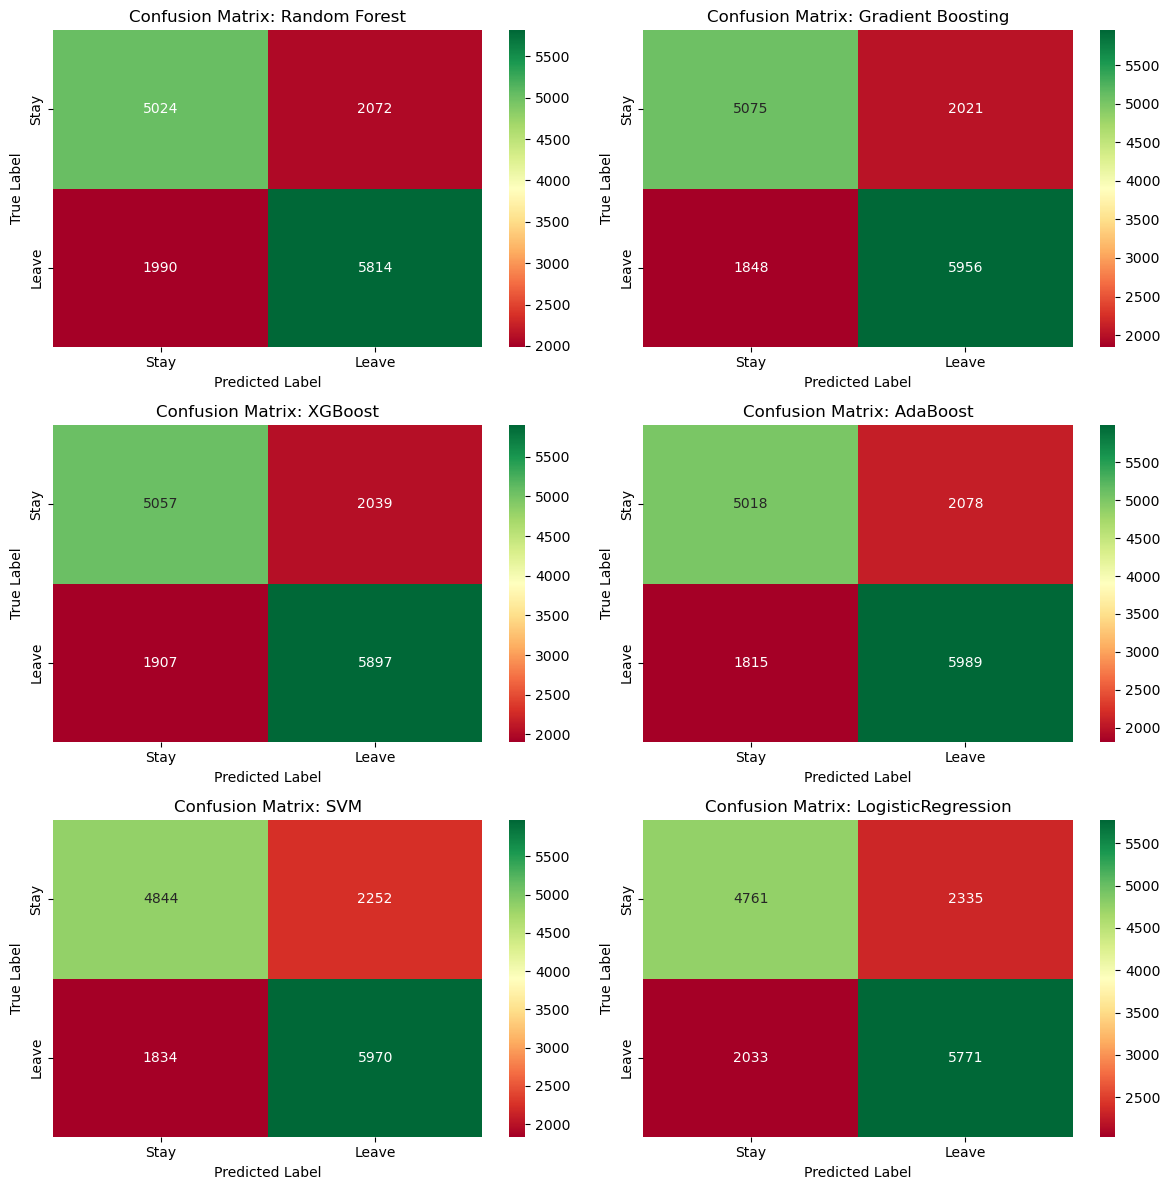

In [64]:
# Plot confusion matrix for each model
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()  # Flatten to easily iterate over

# Loop through models and plot confusion matrices
for i, result in enumerate(results):
    model_name = result['Model']
    cm = result['Confusion Matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', xticklabels=['Stay', 'Leave'], 
                yticklabels=['Stay', 'Leave'], ax=axes[i])

    axes[i].set_title(f"Confusion Matrix: {model_name}")
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


After fitting various models, we can see that **Gradient Boosting** has the best score!

### Fine Tuning for the best model

In [24]:
# Define parameter grid for fine-tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [3, 4, 5],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 3, 5]  # Minimum samples per leaf
}

# Initialize Gradient Boosting model
gbc = GradientBoostingClassifier()

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_gbc = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate best model
y_pred_gbc = best_gbc.predict(X_test)
print("\nBest Gradient Boosting Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("F1 Score:", f1_score(y_test, y_pred_gbc))
print("Recall:", recall_score(y_test, y_pred_gbc))
print("Precision:", precision_score(y_test, y_pred_gbc))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

Best Gradient Boosting Model Performance:
Accuracy: 0.7422147651006712
F1 Score: 0.7560805232742744
Recall: 0.7628139415684264
Precision: 0.749464937680977


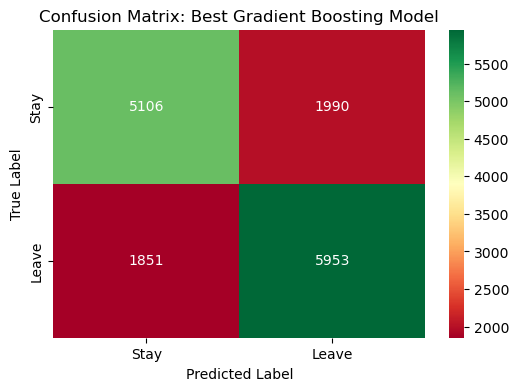

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Confusion Matrix for the Best Model
cm_best = confusion_matrix(y_test, y_pred_gbc)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='RdYlGn', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("Confusion Matrix: Best Gradient Boosting Model")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('best')
plt.show()

In [32]:
# Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbc))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      7096
           1       0.75      0.76      0.76      7804

    accuracy                           0.74     14900
   macro avg       0.74      0.74      0.74     14900
weighted avg       0.74      0.74      0.74     14900



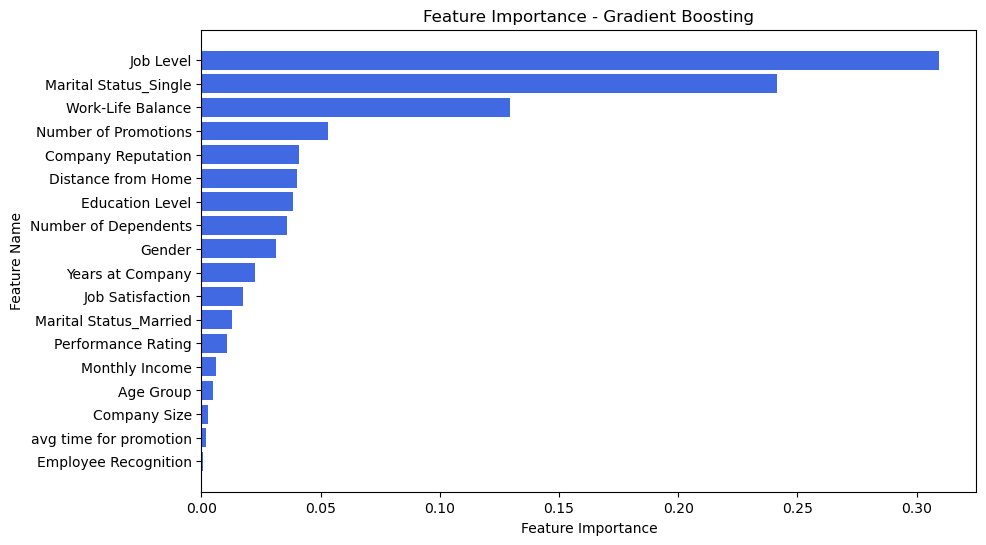

In [42]:
# Feature Importance Plot
feature_importance = best_gbc.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], feature_importance[sorted_idx], color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Gradient Boosting")
plt.show()